In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('E:\\itsstudytym\\Python Project\\ML Notebook Sessions\\Analysis of Diabetes Prediction\\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 0, '0 means no diabetes and 1 means have diabetes')

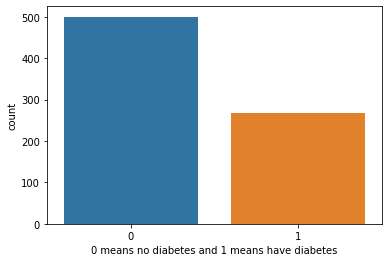

In [5]:
sns.countplot(x='Outcome',data=data)
plt.xlabel('0 means no diabetes and 1 means have diabetes')

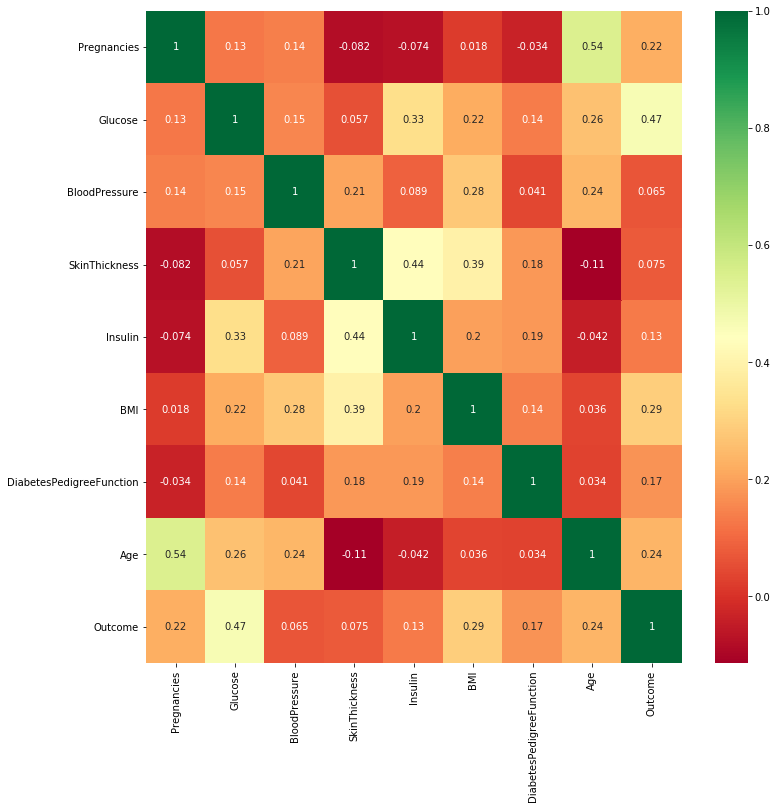

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

#### None Multicollinearity Exist

In [7]:
print("Total number of rows : {0}".format(len(data)))
print("Number of rows missing Glucose Concentration: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("Number of rows missing Blood Pressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("Number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("Number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("Number of rows missing Diab_pred: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("Number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("Number of rows missing Skin: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

Total number of rows : 768
Number of rows missing Glucose Concentration: 5
Number of rows missing Blood Pressure: 35
Number of rows missing Insulin: 374
Number of rows missing BMI: 11
Number of rows missing Diab_pred: 0
Number of rows missing Age: 0
Number of rows missing Skin: 227


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=0,strategy='mean')
imp_x = pd.DataFrame(imp.fit_transform(x))
imp_x.columns = x.columns
imp_index = x.index
imp_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(imp_x,y,test_size=0.25,random_state=10)
x_train.shape

(576, 8)

In [13]:
x_test.shape

(192, 8)

### Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
y_pred = dtree.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
dtree_acc = accuracy_score(y_test,y_pred)
dtree_acc

0.6875

In [17]:
dtree_cm = confusion_matrix(y_test,y_pred)
dtree_cm

array([[96, 25],
       [35, 36]], dtype=int64)

In [18]:
dtree_cls = classification_report(y_test,y_pred)
print(dtree_cls)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       121
           1       0.59      0.51      0.55        71

    accuracy                           0.69       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.68      0.69      0.68       192



### K-Nearest Neighbors Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [20]:
yp = knn.predict(x_test)
yp

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [21]:
knn_acc = accuracy_score(y_test,yp)
knn_acc

0.6875

In [22]:
knn_cm = confusion_matrix(y_test,yp)
knn_cm

array([[105,  16],
       [ 44,  27]], dtype=int64)

In [23]:
knn_cls = classification_report(y_test,yp)
print(knn_cls)

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       121
           1       0.63      0.38      0.47        71

    accuracy                           0.69       192
   macro avg       0.67      0.62      0.63       192
weighted avg       0.68      0.69      0.67       192



#### Choosing K Value

In [24]:
error_rate = []
for i in range(1,51):
    knnc = KNeighborsClassifier(n_neighbors=i)
    knnc.fit(x_train,y_train)
    pred_i = knnc.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

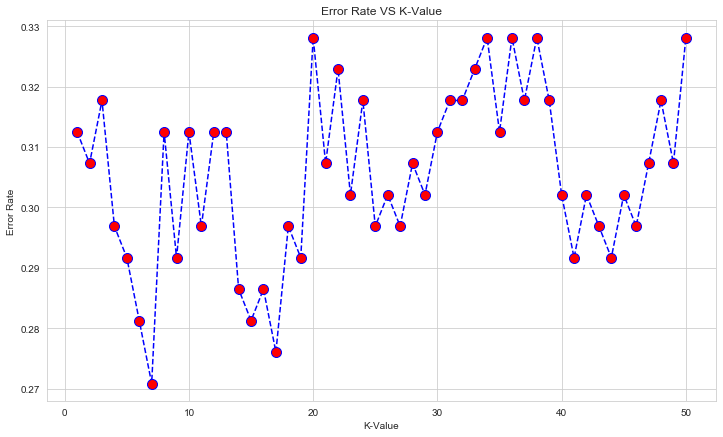

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
plt.plot(range(1,51),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate VS K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [26]:
knnn = KNeighborsClassifier(n_neighbors=16)
knnn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

In [27]:
knny_pred = knnn.predict(x_test)
knny_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [28]:
knnn_acc = accuracy_score(y_test,knny_pred)
knnn_acc

0.7135416666666666

In [29]:
knnn_cm = confusion_matrix(y_test,knny_pred)
knnn_cm

array([[107,  14],
       [ 41,  30]], dtype=int64)

In [30]:
knnn_cls = classification_report(y_test,knny_pred)
print(knnn_cls)

              precision    recall  f1-score   support

           0       0.72      0.88      0.80       121
           1       0.68      0.42      0.52        71

    accuracy                           0.71       192
   macro avg       0.70      0.65      0.66       192
weighted avg       0.71      0.71      0.69       192



### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
y_predicted = rf.predict(x_test)
y_predicted

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [33]:
rf_acc = accuracy_score(y_test,y_predicted)
rf_acc

0.75

In [34]:
rf_cm = confusion_matrix(y_test,y_predicted)
rf_cm

array([[107,  14],
       [ 34,  37]], dtype=int64)

In [35]:
rf_cls = classification_report(y_test,y_predicted)
print(rf_cls)


              precision    recall  f1-score   support

           0       0.76      0.88      0.82       121
           1       0.73      0.52      0.61        71

    accuracy                           0.75       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.75      0.74       192



### Obersvation based on Various Machine Learning Algorithms

Decision Tree Classifier Accuracy : 0.6875 out of 1


K-Nearest Neighbors Accuracy : 0.7135 out of 1


Random Forest Classifier Accuracy : 0.75 out of 1



Accuracy is not so good because of Dataset is slightly imbalaned and contains many 0 values in some rows so imputation is done using mean strategy